In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#brfss_total = pd.read_csv('./csv_data/brfss_total.csv')
brfss_total = pd.read_csv('./brfss_total.csv', index_col=0)

In [3]:
brfss_total.head()

,_STATE,DISPCODE,PHYSHLTH,MENTHLTH,USENOW3,HISPANC2,MARITAL,CHILDREN,EMPLOY,RENTHOM1,SEX,QLACTLM2,ACEDEPRS,ACEDRINK,ACEDRUGS,ACEPRISN,ACEDIVRC,ACEPUNCH,ACEHURT,ACESWEAR,ACETOUCH,ACETTHEM,ACEHVSEX,MSCODE,_IMPAGE,_RFHLTH,_SMOKER3,_PRACE,_EDUCAG,_INCOMG,_TOTINDA
0,5.0,110.0,0.0,0.0,3.0,2.0,1.0,1.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,53.0,1.0,4.0,1.0,3.0,5.0,1.0
1,5.0,110.0,15.0,0.0,3.0,2.0,2.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,3.0,1.0,1.0,1.0,5.0,64.0,2.0,3.0,1.0,2.0,2.0,1.0
2,5.0,110.0,6.0,0.0,3.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,58.0,1.0,4.0,1.0,3.0,2.0,1.0
3,5.0,110.0,30.0,0.0,3.0,2.0,1.0,0.0,0.0,0.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,76.0,2.0,4.0,1.0,1.0,0.0,2.0
4,5.0,110.0,13.0,0.0,3.0,2.0,3.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,5.0,82.0,2.0,3.0,1.0,2.0,0.0,2.0


In [4]:
brfss_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117555 entries, 0 to 117554
Data columns (total 31 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   _STATE    117555 non-null  float64
 1   DISPCODE  117555 non-null  float64
 2   PHYSHLTH  117555 non-null  float64
 3   MENTHLTH  117555 non-null  float64
 4   USENOW3   117555 non-null  float64
 5   HISPANC2  117555 non-null  float64
 6   MARITAL   117555 non-null  float64
 7   CHILDREN  117555 non-null  float64
 8   EMPLOY    117555 non-null  float64
 9   RENTHOM1  117555 non-null  float64
 10  SEX       117555 non-null  float64
 11  QLACTLM2  117555 non-null  float64
 12  ACEDEPRS  117555 non-null  float64
 13  ACEDRINK  117555 non-null  float64
 14  ACEDRUGS  117555 non-null  float64
 15  ACEPRISN  117555 non-null  float64
 16  ACEDIVRC  117555 non-null  float64
 17  ACEPUNCH  117555 non-null  float64
 18  ACEHURT   117555 non-null  float64
 19  ACESWEAR  117555 non-null  float64
 20  ACET

In [5]:
brfss_total.shape

(117555, 31)

In [6]:
# changing value to value labels for sex, race, education level, and income
brfss_total['SEX'] = brfss_total['SEX'].map({1:'Male', 2:'Female'})
brfss_total['_PRACE'] = brfss_total['_PRACE'].map({0:'Unknown', 1:'White', 2:'Black', 3:'Asian', 
                                                   4:'Native Hawaiian or Other Pacific Islander', 5:'American Indian or Alaskan Native', 6:'Other race'})
brfss_total['_EDUCAG'] = brfss_total['_EDUCAG'].map({0:'Unknown', 1:'Did not graduate high school', 
                                                     2:'Graduated high school', 3:'Attended college or technical school',
                                                     4: 'Graduated from College or Technical School'})
brfss_total['_INCOMG'] = brfss_total['_INCOMG'].map({0:'Unknown', 1:'Less than $15000', 2:'$15,000 to $25,000',
                                                     3:'$25,000 to $35,000', 4:'$35,000 to $50,000', 5:'$50,000 or more'})

In [7]:
brfss_total['SEX'].value_counts(normalize=True, ascending=False).to_frame()

,SEX
Female,0.602237
Male,0.397763


In [8]:
# getting rid of all unknown values so they don't appear in visualizations
# got guidance from https://stackoverflow.com/a/50698043
brfss_total.drop(labels = brfss_total[brfss_total['_PRACE'] == 'Unknown'].index, axis=0, inplace=True)
brfss_total.drop(labels = brfss_total[brfss_total['_EDUCAG'] == 'Unknown'].index, axis=0, inplace=True)
brfss_total.drop(labels = brfss_total[brfss_total['_INCOMG'] == 'Unknown'].index, axis=0, inplace=True)

In [9]:
brfss_total.head()

,_STATE,DISPCODE,PHYSHLTH,MENTHLTH,USENOW3,HISPANC2,MARITAL,CHILDREN,EMPLOY,RENTHOM1,SEX,QLACTLM2,ACEDEPRS,ACEDRINK,ACEDRUGS,ACEPRISN,ACEDIVRC,ACEPUNCH,ACEHURT,ACESWEAR,ACETOUCH,ACETTHEM,ACEHVSEX,MSCODE,_IMPAGE,_RFHLTH,_SMOKER3,_PRACE,_EDUCAG,_INCOMG,_TOTINDA
0,5.0,110.0,0.0,0.0,3.0,2.0,1.0,1.0,2.0,0.0,Female,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,53.0,1.0,4.0,White,Attended college or technical school,"$50,000 or more",1.0
1,5.0,110.0,15.0,0.0,3.0,2.0,2.0,0.0,0.0,0.0,Male,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,3.0,1.0,1.0,1.0,5.0,64.0,2.0,3.0,White,Graduated high school,"$15,000 to $25,000",1.0
2,5.0,110.0,6.0,0.0,3.0,2.0,1.0,0.0,0.0,0.0,Male,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,58.0,1.0,4.0,White,Attended college or technical school,"$15,000 to $25,000",1.0
5,5.0,110.0,0.0,0.0,3.0,2.0,1.0,0.0,1.0,0.0,Female,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,49.0,1.0,4.0,White,Graduated from College or Technical School,"$50,000 or more",1.0
6,5.0,110.0,0.0,0.0,3.0,2.0,3.0,0.0,1.0,0.0,Female,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,75.0,1.0,3.0,White,Graduated high school,"$15,000 to $25,000",2.0


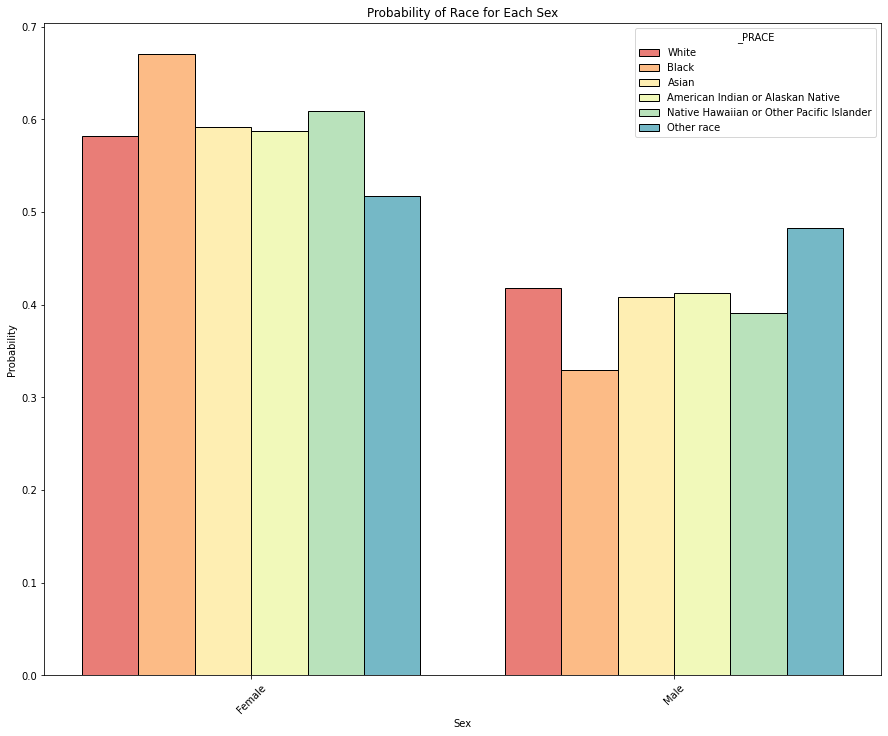

In [10]:
plt.figure(figsize=(15, 12))
sns.histplot(data = brfss_total, x = 'SEX', hue = '_PRACE', multiple='dodge', stat='probability', common_norm = False, discrete=True, shrink=0.8, palette='Spectral')
plt.xticks(rotation=45)
plt.title('Probability of Race for Each Sex')
plt.xlabel('Sex');
#plt.legend(title='Race', labels=brfss_total['_PRACE'].unique());

plt.savefig('sex_race.jpg')

In [11]:
brfss_total['_PRACE'].value_counts(normalize = True, ascending=False).to_frame()

,_PRACE
White,0.841749
Black,0.078365
Asian,0.032279
American Indian or Alaskan Native,0.020409
Other race,0.018660
Native Hawaiian or Other Pacific Islander,0.008539


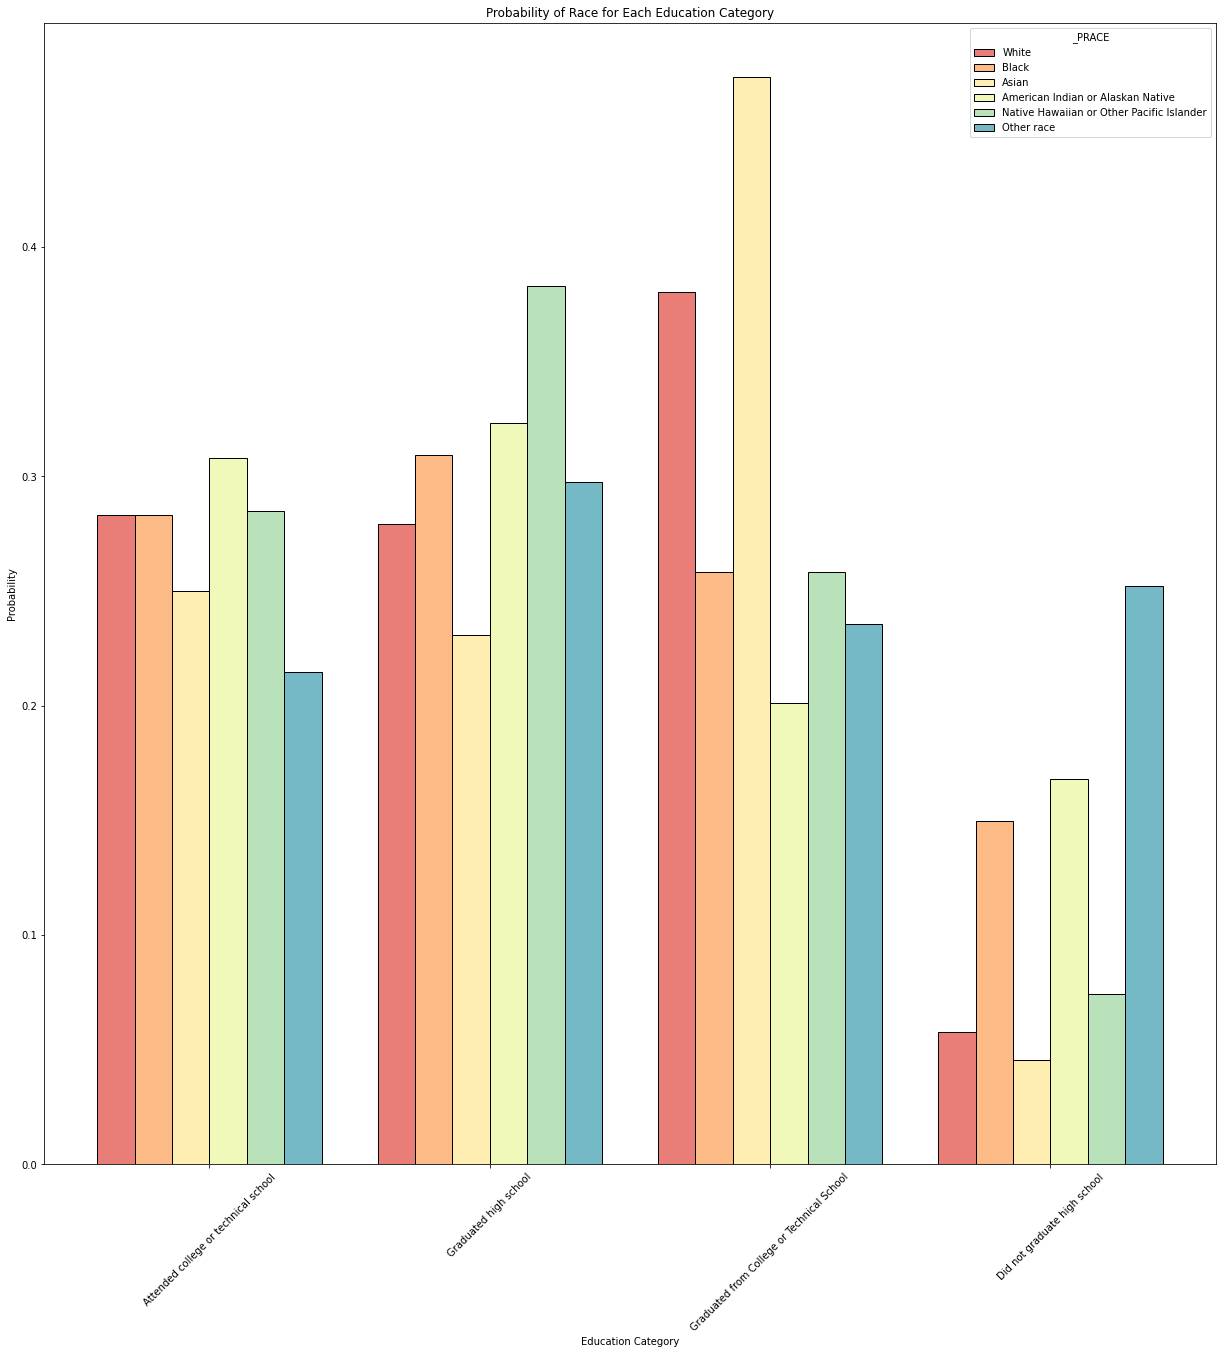

In [12]:
plt.figure(figsize=(21, 21))
sns.histplot(data = brfss_total, x = '_EDUCAG', hue = '_PRACE', multiple='dodge', stat='probability', common_norm = False, discrete=True, shrink=0.8, palette='Spectral')
plt.xticks(rotation=45)
plt.title('Probability of Race for Each Education Category')
plt.xlabel('Education Category')
#plt.legend(title='Race', labels=brfss_total['_PRACE'].unique());

plt.savefig('race_education.jpg')

In [13]:
brfss_total.groupby('SEX')['_PRACE'].value_counts(normalize=True, ascending=False).to_frame()

_PRACE
SEX    _PRACE                                             
Female White                                      0.832524
       Black                                      0.089350
       Asian                                      0.032494
       American Indian or Alaskan Native          0.020397
       Other race                                 0.016398
       Native Hawaiian or Other Pacific Islander  0.008838
Male   White                                      0.854928
       Black                                      0.062671
       Asian                                      0.031972
       Other race                                 0.021890
       American Indian or Alaskan Native          0.020426
       Native Hawaiian or Other Pacific Islander  0.008113

In [14]:
brfss_total['_EDUCAG'].value_counts(normalize=True, ascending=False).to_frame()

,_EDUCAG
Graduated from College or Technical School,0.366264
Graduated high school,0.282158
Attended college or technical school,0.281140
Did not graduate high school,0.070438


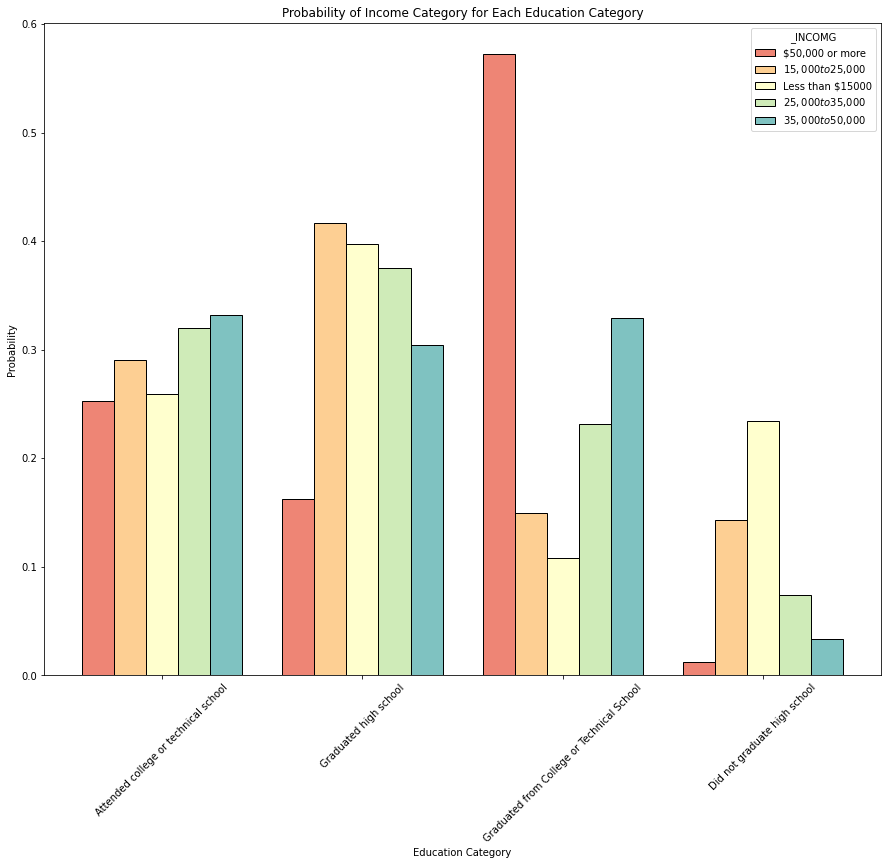

In [18]:
plt.figure(figsize=(15, 12))
sns.histplot(data = brfss_total, x = '_EDUCAG', hue = '_INCOMG', multiple='dodge', stat='probability', common_norm = False, discrete=True, shrink=0.8, palette='Spectral')
plt.xticks(rotation=45)
plt.title('Probability of Income Category for Each Education Category')
plt.xlabel('Education Category')
#plt.legend(title='Income Category') #labels=brfss_total['_INCOMG'].values);

plt.savefig('income_education.jpg')

In [19]:
brfss_total.groupby('_EDUCAG')['_PRACE'].value_counts(normalize=True, ascending=False).to_frame()

_PRACE
_EDUCAG                                    _PRACE                                             
Attended college or technical school       White                                      0.847184
                                           Black                                      0.078851
                                           Asian                                      0.028721
                                           American Indian or Alaskan Native          0.022358
                                           Other race                                 0.014238
                                           Native Hawaiian or Other Pacific Islander  0.008648
Did not graduate high school               White                                      0.688088
                                           Black                                      0.166690
                                           Other race                                 0.066788
                                           American Indian or Alaskan Native          0.048688
                                           Asian                                      0.020766
                                           Native Hawaiian or Other Pacific Islander  0.008980
Graduated from College or Technical School White                                      0.873796
                                           Black                                      0.055209
                                           Asian                                      0.041771
                                           Other race                                 0.012008
                                           American Indian or Alaskan Native          0.011198
                                           Native Hawaiian or Other Pacific Islander  0.006017
Graduated high school                      White                                      0.833094
                                           Black                                      0.085887
                                           Asian                                      0.026376
                                           American Indian or Alaskan Native          0.023363
                                           Other race                                 0.019685
                                           Native Hawaiian or Other Pacific Islander  0.011594

In [20]:
brfss_total['_INCOMG'].value_counts(normalize=True, ascending=False).to_frame()

,_INCOMG
"$50,000 or more",0.431158
"$15,000 to $25,000",0.178640
"$35,000 to $50,000",0.157707
"$25,000 to $35,000",0.127593
Less than $15000,0.104901


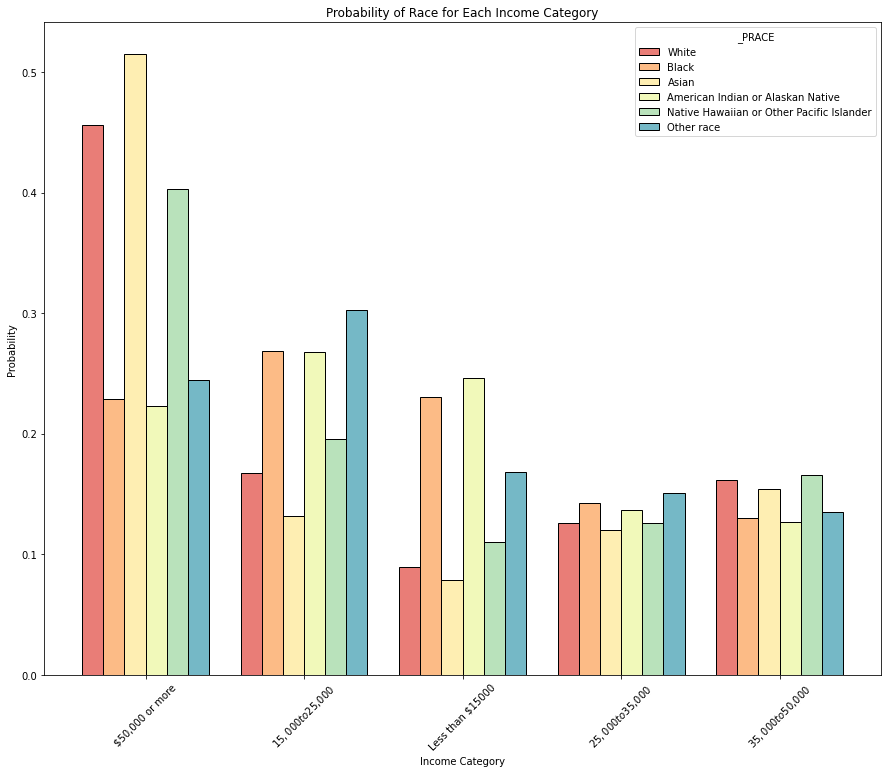

In [21]:
plt.figure(figsize=(15, 12))
sns.histplot(data = brfss_total, x = '_INCOMG', hue='_PRACE', multiple='dodge', stat='probability', common_norm = False, discrete=True, shrink=0.8, palette='Spectral')
plt.xticks(rotation=45)
plt.title('Probability of Race for Each Income Category')
plt.xlabel('Income Category')
#plt.legend(title='Race', labels=brfss_total['_PRACE'].unique());

plt.savefig('income_education.jpg');

In [22]:
brfss_total.groupby('_INCOMG')['_PRACE'].value_counts(normalize=True, ascending=False).to_frame()

_PRACE
_INCOMG            _PRACE                                             
$15,000 to $25,000 White                                      0.786888
                   Black                                      0.117732
                   Other race                                 0.031591
                   American Indian or Alaskan Native          0.030595
                   Asian                                      0.023845
                   Native Hawaiian or Other Pacific Islander  0.009350
$25,000 to $35,000 White                                      0.829977
                   Black                                      0.087374
                   Asian                                      0.030364
                   Other race                                 0.021998
                   American Indian or Alaskan Native          0.021844
                   Native Hawaiian or Other Pacific Islander  0.008443
$35,000 to $50,000 White                                      0.862568
                   Black                                      0.064548
                   Asian                                      0.031585
                   American Indian or Alaskan Native          0.016356
                   Other race                                 0.015980
                   Native Hawaiian or Other Pacific Islander  0.008962
$50,000 or more    White                                      0.890705
                   Black                                      0.041605
                   Asian                                      0.038579
                   American Indian or Alaskan Native          0.010567
                   Other race                                 0.010567
                   Native Hawaiian or Other Pacific Islander  0.007977
Less than $15000   White                                      0.716978
                   Black                                      0.172225
                   American Indian or Alaskan Native          0.047861
                   Other race                                 0.029866
                   Asian                                      0.024119
                   Native Hawaiian or Other Pacific Islander  0.008950

In [23]:
# want to see which states are included by checking their values
brfss_total['_STATE'].value_counts(normalize=True)

27.0    0.120062
53.0    0.117433
55.0    0.117403
50.0    0.114567
37.0    0.089582
30.0    0.082535
22.0    0.071585
15.0    0.055959
19.0    0.054664
47.0    0.050968
40.0    0.032486
11.0    0.031547
5.0     0.030964
32.0    0.030243
Name: _STATE, dtype: float64

In [24]:
# changing value to value labels for states
brfss_total['_STATE'] = brfss_total['_STATE'].map({53:'Washington', 27:'Minnesota', 55:'Wisconsin', 50:'Vermont', 
                                                   37:'North Carolina', 30:'Montana', 22:'Louisiana', 47:'Tennessee',
                                                   19:'Iowa', 15:'Hawaii', 40:'Oklahoma', 5:'Arkansas', 
                                                   11:'District of Columbia', 32:'Nevada'})

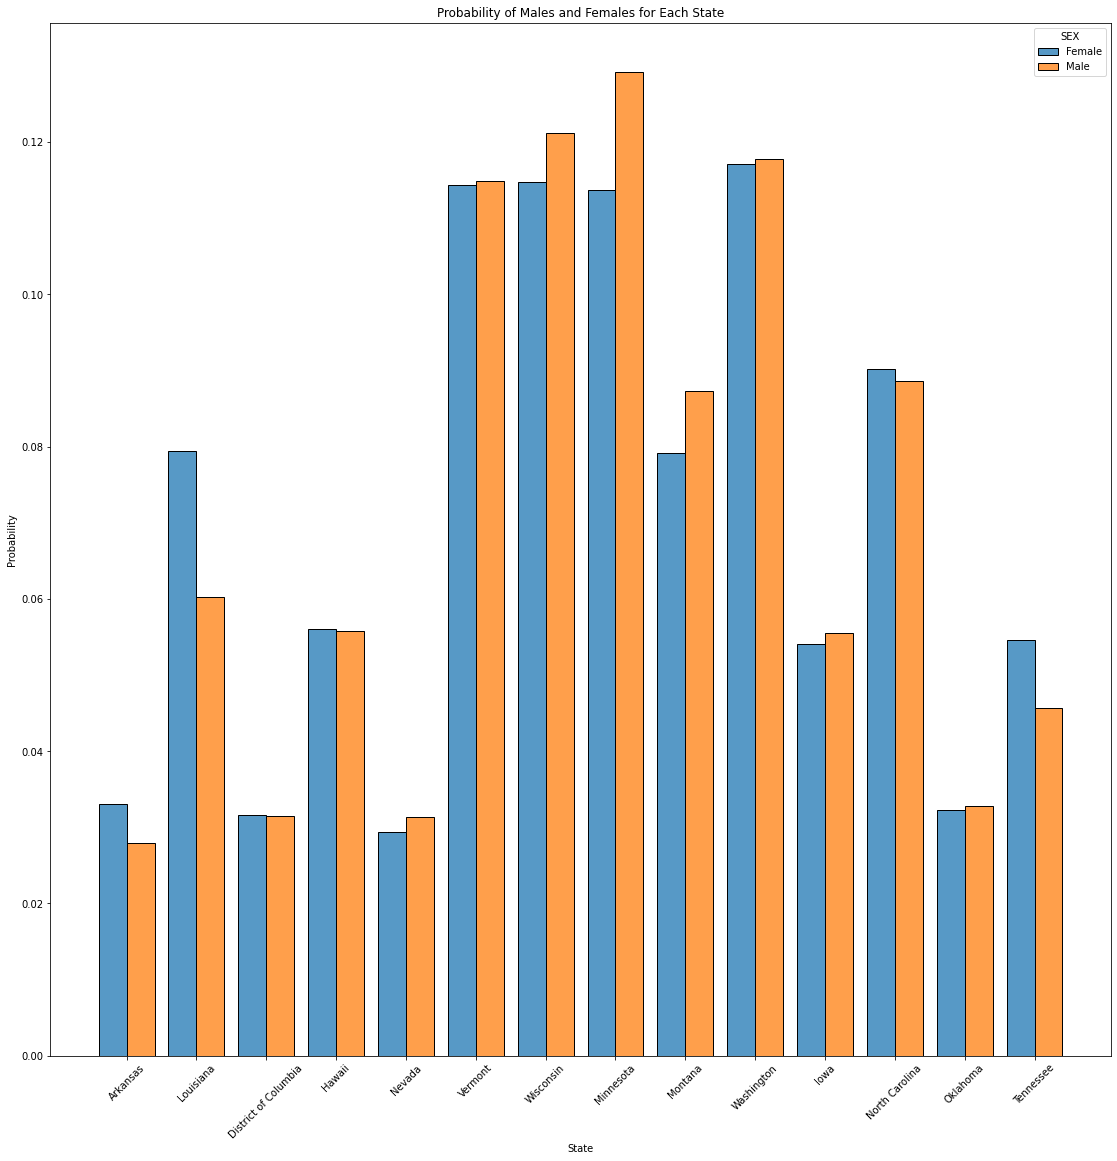

In [25]:
plt.figure(figsize=(19, 19))
sns.histplot(data = brfss_total, x='_STATE', hue='SEX', multiple='dodge', stat='probability', common_norm = False, discrete=True, shrink=0.8)
plt.xticks(rotation=45)
plt.title('Probability of Males and Females for Each State')
plt.xlabel('State')
#plt.legend(title='Sex', labels=brfss_total['SEX'].unique());

plt.savefig('sex_state.jpg');

In [26]:
# creating a separate ACE dataset for analysis
ace = brfss_total[['ACEDEPRS', 'ACEDRINK', 'ACEDRUGS', 'ACEPRISN', 'ACEDIVRC', 'ACEPUNCH', 'ACEHURT', 'ACESWEAR', 
                       'ACETOUCH', 'ACETTHEM', 'ACEHVSEX']]

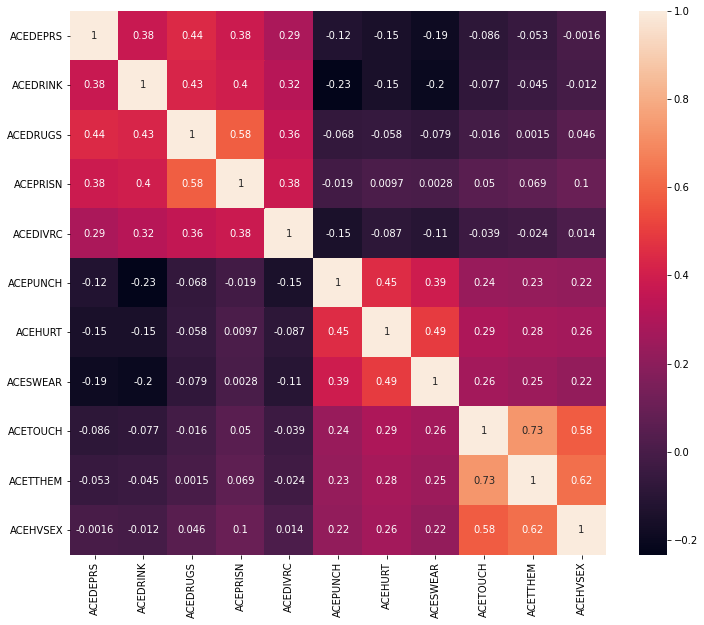

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(ace.corr(), annot=True);

In [27]:
# updating ACE columns to be a count depending on the question
# first 5 questions are yes or no, so yes will be be counted as 1 and no will be counted as 0
# last 6 are questions of frequency, never = 0, once = 1, more than once = 2 (since not given an exact number)
ace['ACEDEPRS'] = ace['ACEDEPRS'].map({1:1, 2:0, 0:0})
ace['ACEDRINK'] = ace['ACEDRINK'].map({1:1, 2:0, 0:0})
ace['ACEDRUGS'] = ace['ACEDRUGS'].map({1:1, 2:0, 0:0})
ace['ACEPRISN'] = ace['ACEPRISN'].map({1:1, 2:0, 0:0})
ace['ACEDIVRC'] = ace['ACEDIVRC'].map({1:1, 2:0, 0:0})
ace['ACEPUNCH'] = ace['ACEPUNCH'].map({1:0, 2:1, 3:2, 0:0})
ace['ACEHURT'] = ace['ACEHURT'].map({1:0, 2:1, 3:2, 0:0})
ace['ACESWEAR'] = ace['ACESWEAR'].map({1:0, 2:1, 3:2, 0:0})
ace['ACETOUCH'] = ace['ACETOUCH'].map({1:0, 2:1, 3:2, 0:0})
ace['ACETTHEM'] = ace['ACETTHEM'].map({1:0, 2:1, 3:2, 0:0})
ace['ACEHVSEX'] = ace['ACEHVSEX'].map({1:0, 2:1, 3:2, 0:0})


# creating a column for counting the number of ACEs an individual had
ace['ACE_Count'] = ace.sum(axis = 1)
brfss_total['ACE_Count'] = ace['ACE_Count']
# put in EDA notebook and create visualization(s)
ace['ACE_Count'].value_counts(normalize=True, ascending=False).to_frame()

,ACE_Count
0,0.416086
1,0.163015
2,0.115832
3,0.072840
4,0.055416
5,0.041381
6,0.032654
7,0.026675
8,0.021308
9,0.015042


In [28]:
# changing value to value labels for ACE questions
brfss_total['ACEDEPRS'] = brfss_total['ACEDEPRS'].map({0:'Unknown', 1:'Yes', 2:'No'})
brfss_total['ACEDRINK'] = brfss_total['ACEDRINK'].map({0:'Unknown', 1:'Yes', 2:'No'})
brfss_total['ACEDRUGS'] = brfss_total['ACEDRUGS'].map({0:'Unknown', 1:'Yes', 2:'No'})
brfss_total['ACEPRISN'] = brfss_total['ACEPRISN'].map({0:'Unknown', 1:'Yes', 2:'No'})
brfss_total['ACEDIVRC'] = brfss_total['ACEDIVRC'].map({0:'Unknown', 1:'Yes', 2:'No'})
brfss_total['ACEPUNCH'] = brfss_total['ACEPUNCH'].map({0:'Unknown', 1:'Never', 2:'Once', 3:'More than once'})
brfss_total['ACEHURT'] = brfss_total['ACEHURT'].map({0:'Unknown', 1:'Never', 2:'Once', 3:'More than once'})
brfss_total['ACESWEAR'] = brfss_total['ACESWEAR'].map({0:'Unknown', 1:'Never', 2:'Once', 3:'More than once'})
brfss_total['ACETOUCH'] = brfss_total['ACETOUCH'].map({0:'Unknown', 1:'Never', 2:'Once', 3:'More than once'})
brfss_total['ACETTHEM'] = brfss_total['ACETTHEM'].map({0:'Unknown', 1:'Never', 2:'Once', 3:'More than once'})
brfss_total['ACEHVSEX'] = brfss_total['ACEHVSEX'].map({0:'Unknown', 1:'Never', 2:'Once', 3:'More than once'})

In [ ]:
brfss_total.to_csv('brfss_total_value_labels.csv')

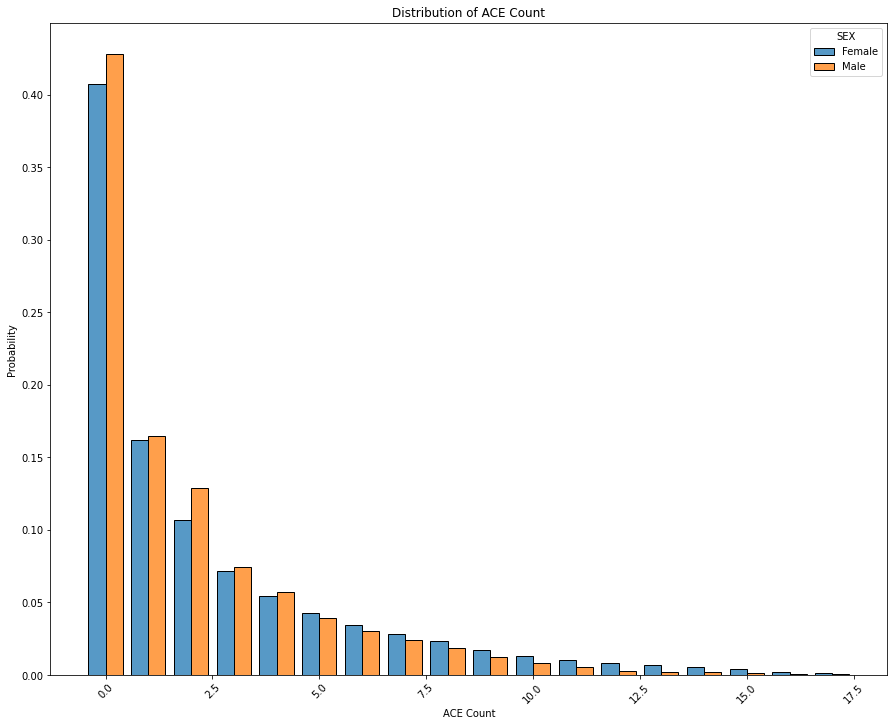

In [29]:
plt.figure(figsize=(15, 12))
sns.histplot(data = brfss_total, x = 'ACE_Count', hue = 'SEX', multiple='dodge', stat='probability', common_norm = False, discrete=True, shrink=0.8)
plt.xticks(rotation=45)
plt.title('Distribution of ACE Count')
plt.xlabel('ACE Count');

plt.savefig('ACE_count.jpg')

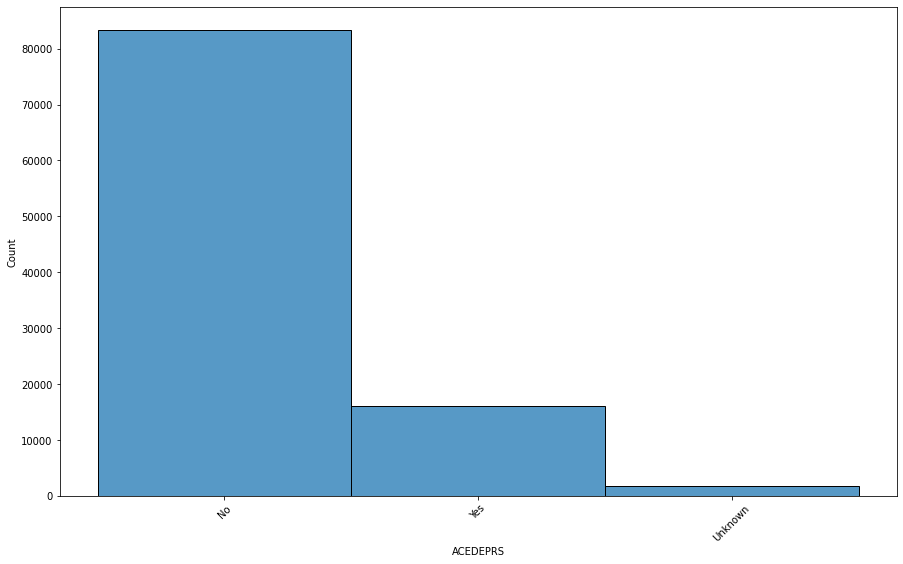

In [ ]:
plt.figure(figsize=(15, 9))
sns.histplot(brfss_total['ACEDEPRS'])
plt.xticks(rotation=45);

In [ ]:
# got guidance for this from https://re-thought.com/pandas-value_counts/
brfss_total.groupby('_STATE')['ACEDEPRS'].value_counts(normalize=True, ascending=False).to_frame()

ACEDEPRS
_STATE               ACEDEPRS          
Arkansas             No        0.856368
                     Yes       0.137249
                     Unknown   0.006384
District of Columbia No        0.819862
                     Yes       0.165100
                     Unknown   0.015038
Hawaii               No        0.862593
                     Yes       0.131049
                     Unknown   0.006358
Iowa                 No        0.830772
                     Yes       0.159284
                     Unknown   0.009944
Louisiana            No        0.826039
                     Yes       0.157117
                     Unknown   0.016844
Minnesota            No        0.817912
                     Yes       0.163978
                     Unknown   0.018110
Montana              No        0.823853
                     Yes       0.167645
                     Unknown   0.008502
Nevada               No        0.803922
                     Yes       0.186601
                     Unknown   0.009477
North Carolina       No        0.844660
                     Yes       0.143645
                     Unknown   0.011695
Oklahoma             No        0.837846
                     Yes       0.154244
                     Unknown   0.007910
Tennessee            No        0.710878
                     Yes       0.148148
                     Unknown   0.140973
Vermont              No        0.810904
                     Yes       0.179089
                     Unknown   0.010007
Washington           No        0.803653
                     Yes       0.188857
                     Unknown   0.007490
Wisconsin            No        0.864467
                     Yes       0.128883
                     Unknown   0.006650

In [ ]:
brfss_total.groupby('_PRACE')['ACEDEPRS'].value_counts(normalize=True, ascending=False).to_frame()

ACEDEPRS
_PRACE                                    ACEDEPRS          
American Indian or Alaskan Native         No        0.800000
                                          Yes       0.185956
                                          Unknown   0.014044
Asian                                     No        0.920086
                                          Yes       0.067667
                                          Unknown   0.012247
Black                                     No        0.863287
                                          Yes       0.104427
                                          Unknown   0.032287
Native Hawaiian or Other Pacific Islander No        0.854167
                                          Yes       0.138889
                                          Unknown   0.006944
Other race                                No        0.835275
                                          Yes       0.150953
                                          Unknown   0.013771
White                                     No        0.816201
                                          Yes       0.167514
                                          Unknown   0.016285

In [ ]:
brfss_total.groupby('SEX')['ACEDEPRS'].value_counts(normalize=True, ascending=False).to_frame()

ACEDEPRS
SEX    ACEDEPRS          
Female No        0.799005
       Yes       0.183672
       Unknown   0.017322
Male   No        0.858720
       Yes       0.124166
       Unknown   0.017114

In [ ]:
brfss_total.groupby('_EDUCAG')['ACEDEPRS'].value_counts(normalize=True, ascending=False).to_frame()

ACEDEPRS
_EDUCAG                                    ACEDEPRS          
Attended college or technical school       No        0.810413
                                           Yes       0.173381
                                           Unknown   0.016206
Did not graduate high school               No        0.832328
                                           Yes       0.133717
                                           Unknown   0.033955
Graduated from College or Technical School No        0.807712
                                           Yes       0.178472
                                           Unknown   0.013816
Graduated high school                      No        0.855161
                                           Yes       0.126309
                                           Unknown   0.018530

In [ ]:
brfss_total.groupby('_INCOMG')['ACEDEPRS'].value_counts(normalize=True, ascending=False).to_frame()

ACEDEPRS
_INCOMG            ACEDEPRS          
$15,000 to $25,000 No        0.824730
                   Yes       0.154025
                   Unknown   0.021245
$25,000 to $35,000 No        0.840511
                   Yes       0.140356
                   Unknown   0.019132
$35,000 to $50,000 No        0.836498
                   Yes       0.149026
                   Unknown   0.014476
$50,000 or more    No        0.826223
                   Yes       0.161765
                   Unknown   0.012011
Less than $15000   No        0.770869
                   Yes       0.195402
                   Unknown   0.033729

In [ ]:
brfss_total.groupby('_STATE')['ACEDRINK'].value_counts(normalize=True, ascending=False).to_frame()

ACEDRINK
_STATE               ACEDRINK          
Arkansas             No        0.782636
                     Yes       0.214172
                     Unknown   0.003192
District of Columbia No        0.782895
                     Yes       0.209273
                     Unknown   0.007832
Hawaii               No        0.790180
                     Yes       0.205758
                     Unknown   0.004062
Iowa                 No        0.777617
                     Yes       0.214609
                     Unknown   0.007774
Louisiana            No        0.761977
                     Yes       0.224493
                     Unknown   0.013530
Minnesota            No        0.746378
                     Yes       0.238229
                     Unknown   0.015393
Montana              No        0.714286
                     Yes       0.280924
                     Unknown   0.004790
Nevada               No        0.690523
                     Yes       0.303595
                     Unknown   0.005882
North Carolina       No        0.758274
                     Yes       0.232789
                     Unknown   0.008936
Oklahoma             No        0.761789
                     Yes       0.232127
                     Unknown   0.006085
Tennessee            No        0.630987
                     Yes       0.230560
                     Unknown   0.138453
Vermont              No        0.737233
                     Yes       0.256125
                     Unknown   0.006643
Washington           No        0.730853
                     Yes       0.264265
                     Unknown   0.004881
Wisconsin            No        0.774813
                     Yes       0.221147
                     Unknown   0.004041

In [ ]:
brfss_total.groupby('_PRACE')['ACEDRINK'].value_counts(normalize=True, ascending=False).to_frame()

ACEDRINK
_PRACE                                    ACEDRINK          
American Indian or Alaskan Native         No        0.604843
                                          Yes       0.384019
                                          Unknown   0.011138
Asian                                     No        0.887324
                                          Yes       0.106246
                                          Unknown   0.006430
Black                                     No        0.747005
                                          Yes       0.226510
                                          Unknown   0.026485
Native Hawaiian or Other Pacific Islander No        0.721065
                                          Yes       0.275463
                                          Unknown   0.003472
Other race                                No        0.722458
                                          Yes       0.266949
                                          Unknown   0.010593
White                                     No        0.744379
                                          Yes       0.241942
                                          Unknown   0.013679

In [ ]:
brfss_total.groupby('SEX')['ACEDRINK'].value_counts(normalize=True, ascending=False).to_frame()

ACEDRINK
SEX    ACEDRINK          
Female No        0.727717
       Yes       0.257884
       Unknown   0.014399
Male   No        0.771494
       Yes       0.214464
       Unknown   0.014042

In [ ]:
brfss_total.groupby('_EDUCAG')['ACEDRINK'].value_counts(normalize=True, ascending=False).to_frame()

ACEDRINK
_EDUCAG                                    ACEDRINK          
Attended college or technical school       No        0.726921
                                           Yes       0.260318
                                           Unknown   0.012761
Did not graduate high school               No        0.678125
                                           Yes       0.293111
                                           Unknown   0.028764
Graduated from College or Technical School No        0.781807
                                           Yes       0.206967
                                           Unknown   0.011225
Graduated high school                      No        0.734562
                                           Yes       0.249396
                                           Unknown   0.016043

In [ ]:
brfss_total.groupby('_INCOMG')['ACEDRINK'].value_counts(normalize=True, ascending=False).to_frame()

ACEDRINK
_INCOMG            ACEDRINK          
$15,000 to $25,000 No        0.729018
                   Yes       0.252559
                   Unknown   0.018423
$25,000 to $35,000 No        0.746321
                   Yes       0.237490
                   Unknown   0.016189
$35,000 to $50,000 No        0.756659
                   Yes       0.231936
                   Unknown   0.011406
$50,000 or more    No        0.767289
                   Yes       0.222762
                   Unknown   0.009948
Less than $15000   No        0.668551
                   Yes       0.304692
                   Unknown   0.026757

In [ ]:
brfss_total.groupby('_STATE')['ACEDRUGS'].value_counts(normalize=True, ascending=False).to_frame()

ACEDRUGS
_STATE               ACEDRUGS          
Arkansas             No        0.934568
                     Yes       0.061921
                     Unknown   0.003511
District of Columbia No        0.902882
                     Yes       0.090226
                     Unknown   0.006892
Hawaii               No        0.911162
                     Yes       0.084776
                     Unknown   0.004062
Iowa                 No        0.920810
                     Yes       0.071416
                     Unknown   0.007774
Louisiana            No        0.905840
                     Yes       0.079663
                     Unknown   0.014497
Minnesota            No        0.902947
                     Yes       0.081824
                     Unknown   0.015229
Montana              No        0.912705
                     Yes       0.083463
                     Unknown   0.003832
Nevada               No        0.875163
                     Yes       0.117647
                     Unknown   0.007190
North Carolina       No        0.907877
                     Yes       0.083186
                     Unknown   0.008936
Oklahoma             No        0.903559
                     Yes       0.089443
                     Unknown   0.006997
Tennessee            No        0.787861
                     Unknown   0.138646
                     Yes       0.073492
Vermont              No        0.926415
                     Yes       0.067805
                     Unknown   0.005780
Washington           No        0.906918
                     Yes       0.088621
                     Unknown   0.004461
Wisconsin            No        0.928277
                     Yes       0.068608
                     Unknown   0.003115

In [ ]:
brfss_total.groupby('_PRACE')['ACEDRUGS'].value_counts(normalize=True, ascending=False).to_frame()

ACEDRUGS
_PRACE                                    ACEDRUGS          
American Indian or Alaskan Native         No        0.850847
                                          Yes       0.138015
                                          Unknown   0.011138
Asian                                     No        0.958053
                                          Yes       0.035517
                                          Unknown   0.006430
Black                                     No        0.858242
                                          Yes       0.114012
                                          Unknown   0.027746
Native Hawaiian or Other Pacific Islander No        0.846065
                                          Yes       0.148148
                                          Unknown   0.005787
Other race                                No        0.882945
                                          Yes       0.106462
                                          Unknown   0.010593
White                                     No        0.911212
                                          Yes       0.075520
                                          Unknown   0.013268

In [ ]:
brfss_total.groupby('SEX')['ACEDRUGS'].value_counts(normalize=True, ascending=False).to_frame()

ACEDRUGS
SEX    ACEDRUGS          
Female No        0.906517
       Yes       0.078916
       Unknown   0.014567
Male   No        0.905885
       Yes       0.080865
       Unknown   0.013249

In [ ]:
brfss_total.groupby('_EDUCAG')['ACEDRUGS'].value_counts(normalize=True, ascending=False).to_frame()

ACEDRUGS
_EDUCAG                                    ACEDRUGS          
Attended college or technical school       No        0.891408
                                           Yes       0.094882
                                           Unknown   0.013710
Did not graduate high school               No        0.866704
                                           Yes       0.104392
                                           Unknown   0.028904
Graduated from College or Technical School No        0.925173
                                           Yes       0.064519
                                           Unknown   0.010308
Graduated high school                      No        0.906372
                                           Yes       0.078181
                                           Unknown   0.015447

In [ ]:
brfss_total.groupby('_INCOMG')['ACEDRUGS'].value_counts(normalize=True, ascending=False).to_frame()

ACEDRUGS
_INCOMG            ACEDRUGS          
$15,000 to $25,000 No        0.894772
                   Yes       0.087580
                   Unknown   0.017649
$25,000 to $35,000 No        0.912471
                   Yes       0.071495
                   Unknown   0.016034
$35,000 to $50,000 No        0.917654
                   Yes       0.070690
                   Unknown   0.011656
$50,000 or more    No        0.916630
                   Yes       0.074017
                   Unknown   0.009352
Less than $15000   No        0.858489
                   Yes       0.113341
                   Unknown   0.028170

In [ ]:
brfss_total.groupby('_STATE')['ACEPRISN'].value_counts(normalize=True, ascending=False).to_frame()

ACEPRISN
_STATE               ACEPRISN          
Arkansas             No        0.956910
                     Yes       0.041494
                     Unknown   0.001596
District of Columbia No        0.932957
                     Yes       0.062970
                     Unknown   0.004073
Hawaii               No        0.952490
                     Yes       0.044860
                     Unknown   0.002649
Iowa                 No        0.950280
                     Yes       0.043934
                     Unknown   0.005786
Louisiana            No        0.938699
                     Yes       0.049841
                     Unknown   0.011459
Minnesota            No        0.940484
                     Yes       0.046345
                     Unknown   0.013171
Montana              No        0.945635
                     Yes       0.051132
                     Unknown   0.003233
Nevada               No        0.932680
                     Yes       0.061765
                     Unknown   0.005556
North Carolina       No        0.928067
                     Yes       0.065203
                     Unknown   0.006730
Oklahoma             No        0.931853
                     Yes       0.062367
                     Unknown   0.005780
Tennessee            No        0.796005
                     Unknown   0.138646
                     Yes       0.065348
Vermont              No        0.964803
                     Yes       0.032350
                     Unknown   0.002847
Washington           No        0.950766
                     Yes       0.047467
                     Unknown   0.001767
Wisconsin            No        0.948228
                     Yes       0.049499
                     Unknown   0.002273

In [ ]:
brfss_total.groupby('_PRACE')['ACEPRISN'].value_counts(normalize=True, ascending=False).to_frame()

ACEPRISN
_PRACE                                    ACEPRISN          
American Indian or Alaskan Native         No        0.851816
                                          Yes       0.138499
                                          Unknown   0.009685
Asian                                     No        0.972750
                                          Yes       0.021739
                                          Unknown   0.005511
Black                                     No        0.860638
                                          Yes       0.114264
                                          Unknown   0.025098
Native Hawaiian or Other Pacific Islander No        0.905093
                                          Yes       0.089120
                                          Unknown   0.005787
Other race                                No        0.924788
                                          Yes       0.066737
                                          Unknown   0.008475
White                                     No        0.946788
                                          Yes       0.041823
                                          Unknown   0.011389

In [ ]:
brfss_total.groupby('SEX')['ACEPRISN'].value_counts(normalize=True, ascending=False).to_frame()

ACEPRISN
SEX    ACEPRISN          
Female No        0.939549
       Yes       0.048085
       Unknown   0.012366
Male   No        0.936201
       Yes       0.051990
       Unknown   0.011809

In [ ]:
brfss_total.groupby('_EDUCAG')['ACEPRISN'].value_counts(normalize=True, ascending=False).to_frame()

ACEPRISN
_EDUCAG                                    ACEPRISN          
Attended college or technical school       No        0.930922
                                           Yes       0.057372
                                           Unknown   0.011706
Did not graduate high school               No        0.870072
                                           Yes       0.103269
                                           Unknown   0.026659
Graduated from College or Technical School No        0.965460
                                           Yes       0.026390
                                           Unknown   0.008149
Graduated high school                      No        0.926968
                                           Yes       0.058916
                                           Unknown   0.014116

In [ ]:
brfss_total.groupby('_INCOMG')['ACEPRISN'].value_counts(normalize=True, ascending=False).to_frame()

ACEPRISN
_INCOMG            ACEPRISN          
$15,000 to $25,000 No        0.912365
                   Yes       0.070871
                   Unknown   0.016763
$25,000 to $35,000 No        0.932610
                   Yes       0.052517
                   Unknown   0.014872
$35,000 to $50,000 No        0.948173
                   Yes       0.042803
                   Unknown   0.009024
$50,000 or more    No        0.960894
                   Yes       0.031496
                   Unknown   0.007610
Less than $15000   No        0.880441
                   Yes       0.095346
                   Unknown   0.024213

In [ ]:
brfss_total.groupby('_STATE')['ACEDIVRC'].value_counts(normalize=True, ascending=False).to_frame()

ACEDIVRC
_STATE               ACEDIVRC          
Arkansas             No        0.782317
                     Yes       0.209065
                     Unknown   0.008618
District of Columbia No        0.728070
                     Yes       0.244987
                     Unknown   0.026942
Hawaii               No        0.804839
                     Yes       0.189332
                     Unknown   0.005828
Iowa                 No        0.823540
                     Yes       0.167420
                     Unknown   0.009040
Louisiana            No        0.754522
                     Yes       0.220213
                     Unknown   0.025266
Minnesota            No        0.804001
                     Yes       0.173856
                     Unknown   0.022144
Montana              No        0.775835
                     Yes       0.217698
                     Unknown   0.006466
Nevada               No        0.700327
                     Yes       0.287908
                     Unknown   0.011765
North Carolina       No        0.740512
                     Yes       0.234885
                     Unknown   0.024603
Oklahoma             No        0.724369
                     Yes       0.261333
                     Unknown   0.014299
Tennessee            No        0.624200
                     Yes       0.218150
                     Unknown   0.157650
Vermont              No        0.806677
                     Yes       0.186853
                     Unknown   0.006470
Washington           No        0.756859
                     Yes       0.234388
                     Unknown   0.008753
Wisconsin            No        0.800404
                     Yes       0.189242
                     Unknown   0.010354

In [ ]:
brfss_total.groupby('_PRACE')['ACEDIVRC'].value_counts(normalize=True, ascending=False).to_frame()

ACEDIVRC
_PRACE                                    ACEDIVRC          
American Indian or Alaskan Native         No        0.636320
                                          Yes       0.334140
                                          Unknown   0.029540
Asian                                     No        0.896203
                                          Yes       0.098898
                                          Unknown   0.004899
Black                                     No        0.572329
                                          Yes       0.350486
                                          Unknown   0.077185
Native Hawaiian or Other Pacific Islander No        0.702546
                                          Yes       0.277778
                                          Unknown   0.019676
Other race                                No        0.721398
                                          Yes       0.250530
                                          Unknown   0.028072
White                                     No        0.788515
                                          Yes       0.195470
                                          Unknown   0.016015

In [ ]:
brfss_total.groupby('SEX')['ACEDIVRC'].value_counts(normalize=True, ascending=False).to_frame()

ACEDIVRC
SEX    ACEDIVRC          
Female No        0.762849
       Yes       0.214385
       Unknown   0.022766
Male   No        0.780111
       Yes       0.201455
       Unknown   0.018434

In [ ]:
brfss_total.groupby('_EDUCAG')['ACEDIVRC'].value_counts(normalize=True, ascending=False).to_frame()

ACEDIVRC
_EDUCAG                                    ACEDIVRC          
Attended college or technical school       No        0.745869
                                           Yes       0.232968
                                           Unknown   0.021163
Did not graduate high school               No        0.670268
                                           Yes       0.281886
                                           Unknown   0.047846
Graduated from College or Technical School No        0.825953
                                           Yes       0.161202
                                           Unknown   0.012844
Graduated high school                      No        0.746156
                                           Yes       0.229185
                                           Unknown   0.024659

In [ ]:
brfss_total.groupby('_INCOMG')['ACEDIVRC'].value_counts(normalize=True, ascending=False).to_frame()

ACEDIVRC
_INCOMG            ACEDIVRC          
$15,000 to $25,000 No        0.735214
                   Yes       0.234191
                   Unknown   0.030595
$25,000 to $35,000 No        0.765686
                   Yes       0.210302
                   Unknown   0.024012
$35,000 to $50,000 No        0.786739
                   Yes       0.197092
                   Unknown   0.016168
$50,000 or more    No        0.804722
                   Yes       0.183519
                   Unknown   0.011759
Less than $15000   No        0.666196
                   Yes       0.287733
                   Unknown   0.046071

In [ ]:
brfss_total.groupby('_STATE')['ACEPUNCH'].value_counts(normalize=True, ascending=False).to_frame()

ACEPUNCH
_STATE               ACEPUNCH                
Arkansas             Never           0.839132
                     More than once  0.112991
                     Once            0.033514
                     Unknown         0.014363
District of Columbia Never           0.826754
                     More than once  0.102130
                     Once            0.053258
                     Unknown         0.017857
Hawaii               Never           0.821794
                     More than once  0.117803
                     Once            0.047333
                     Unknown         0.013070
Iowa                 Never           0.841078
                     More than once  0.108299
                     Once            0.036702
                     Unknown         0.013922
Louisiana            Never           0.837636
                     More than once  0.107828
                     Once            0.028717
                     Unknown         0.025818
Minnesota            Never           0.840961
                     More than once  0.096724
                     Once            0.038278
                     Unknown         0.024037
Montana              Never           0.823734
                     More than once  0.129086
                     Once            0.030535
                     Unknown         0.016645
Nevada               Never           0.782353
                     More than once  0.150980
                     Once            0.047386
                     Unknown         0.019281
North Carolina       Never           0.816527
                     More than once  0.124448
                     Once            0.038614
                     Unknown         0.020410
Oklahoma             Never           0.815637
                     More than once  0.134469
                     Once            0.034378
                     Unknown         0.015516
Tennessee            Never           0.688191
                     Unknown         0.153772
                     More than once  0.122746
                     Once            0.035292
Vermont              Never           0.844720
                     More than once  0.104037
                     Once            0.038475
                     Unknown         0.012767
Washington           Never           0.818886
                     More than once  0.122033
                     Once            0.048813
                     Unknown         0.010268
Wisconsin            Never           0.830457
                     More than once  0.109521
                     Once            0.046637
                     Unknown         0.013385

In [ ]:
brfss_total.groupby('_PRACE')['ACEPUNCH'].value_counts(normalize=True, ascending=False).to_frame()

ACEPUNCH
_PRACE                                    ACEPUNCH                
American Indian or Alaskan Native         Never           0.677482
                                          More than once  0.229056
                                          Once            0.057143
                                          Unknown         0.036320
Asian                                     Never           0.865279
                                          More than once  0.076240
                                          Once            0.041641
                                          Unknown         0.016840
Black                                     Never           0.746879
                                          More than once  0.153613
                                          Once            0.052340
                                          Unknown         0.047169
Native Hawaiian or Other Pacific Islander Never           0.687500
                                          More than once  0.200231
                                          Once            0.085648
                                          Unknown         0.026620
Other race                                Never           0.735699
                                          More than once  0.172140
                                          Once            0.065148
                                          Unknown         0.027013
White                                     Never           0.833836
                                          More than once  0.107598
                                          Once            0.037314
                                          Unknown         0.021252

In [ ]:
brfss_total.groupby('SEX')['ACEPUNCH'].value_counts(normalize=True, ascending=False).to_frame()

ACEPUNCH
SEX    ACEPUNCH                
Female Never           0.815740
       More than once  0.122112
       Once            0.038862
       Unknown         0.023287
Male   Never           0.830373
       More than once  0.104028
       Once            0.041549
       Unknown         0.024051

In [ ]:
brfss_total.groupby('_EDUCAG')['ACEPUNCH'].value_counts(normalize=True, ascending=False).to_frame()

ACEPUNCH
_EDUCAG                                    ACEPUNCH                
Attended college or technical school       Never           0.806968
                                           More than once  0.129298
                                           Once            0.041763
                                           Unknown         0.021971
Did not graduate high school               Never           0.723727
                                           More than once  0.177073
                                           Unknown         0.051073
                                           Once            0.048127
Graduated from College or Technical School Never           0.866024
                                           More than once  0.082652
                                           Once            0.036105
                                           Unknown         0.015219
Graduated high school                      Never           0.803531
                                           More than once  0.126064
                                           Once            0.041157
                                           Unknown         0.029248

In [ ]:
brfss_total.groupby('_INCOMG')['ACEPUNCH'].value_counts(normalize=True, ascending=False).to_frame()

ACEPUNCH
_INCOMG            ACEPUNCH                
$15,000 to $25,000 Never           0.793140
                   More than once  0.133057
                   Once            0.041272
                   Unknown         0.032531
$25,000 to $35,000 Never           0.818900
                   More than once  0.110844
                   Once            0.041828
                   Unknown         0.028428
$35,000 to $50,000 Never           0.830670
                   More than once  0.109858
                   Once            0.039857
                   Unknown         0.019615
$50,000 or more    Never           0.854166
                   More than once  0.094097
                   Once            0.037295
                   Unknown         0.014441
Less than $15000   Never           0.727435
                   More than once  0.179763
                   Once            0.046637
                   Unknown         0.046165

In [ ]:
brfss_total.groupby('_STATE')['ACEHURT'].value_counts(normalize=True, ascending=False).to_frame()

ACEHURT
_STATE               ACEHURT                 
Arkansas             Never           0.867858
                     More than once  0.092882
                     Once            0.030322
                     Unknown         0.008937
District of Columbia Never           0.856203
                     More than once  0.103697
                     Once            0.029135
                     Unknown         0.010965
Hawaii               Never           0.832568
                     More than once  0.120452
                     Once            0.041152
                     Unknown         0.005828
Iowa                 Never           0.841078
                     More than once  0.111191
                     Once            0.038691
                     Unknown         0.009040
Louisiana            Never           0.882231
                     More than once  0.076488
                     Once            0.023195
                     Unknown         0.018086
Minnesota            Never           0.834294
                     More than once  0.104215
                     Once            0.043135
                     Unknown         0.018357
Montana              Never           0.825769
                     More than once  0.125853
                     Once            0.040833
                     Unknown         0.007544
Nevada               Never           0.776471
                     More than once  0.162418
                     Once            0.052614
                     Unknown         0.008497
North Carolina       Never           0.846977
                     More than once  0.110216
                     Once            0.030119
                     Unknown         0.012688
Oklahoma             Never           0.845452
                     More than once  0.113782
                     Once            0.034378
                     Unknown         0.006389
Tennessee            Never           0.738996
                     Unknown         0.147566
                     More than once  0.092108
                     Once            0.021330
Vermont              Never           0.840148
                     More than once  0.112836
                     Once            0.038475
                     Unknown         0.008540
Washington           Never           0.811564
                     More than once  0.138697
                     Once            0.044605
                     Unknown         0.005134
Wisconsin            Never           0.833656
                     More than once  0.115498
                     Once            0.043522
                     Unknown         0.007324

In [ ]:
brfss_total.groupby('_PRACE')['ACEHURT'].value_counts(normalize=True, ascending=False).to_frame()

ACEHURT
_PRACE                                    ACEHURT                 
American Indian or Alaskan Native         Never           0.749153
                                          More than once  0.189346
                                          Once            0.046489
                                          Unknown         0.015012
Asian                                     Never           0.882731
                                          More than once  0.071035
                                          Once            0.036742
                                          Unknown         0.009492
Black                                     Never           0.843360
                                          More than once  0.091815
                                          Unknown         0.035187
                                          Once            0.029638
Native Hawaiian or Other Pacific Islander Never           0.769676
                                          More than once  0.166667
                                          Once            0.053241
                                          Unknown         0.010417
Other race                                Never           0.736229
                                          More than once  0.193856
                                          Once            0.049788
                                          Unknown         0.020127
White                                     Never           0.833578
                                          More than once  0.112741
                                          Once            0.037889
                                          Unknown         0.015792

In [ ]:
brfss_total.groupby('SEX')['ACEHURT'].value_counts(normalize=True, ascending=False).to_frame()

ACEHURT
SEX    ACEHURT                 
Female Never           0.833011
       More than once  0.113342
       Once            0.036509
       Unknown         0.017137
Male   Never           0.830181
       More than once  0.113221
       Once            0.039484
       Unknown         0.017114

In [ ]:
brfss_total.groupby('_EDUCAG')['ACEHURT'].value_counts(normalize=True, ascending=False).to_frame()

ACEHURT
_EDUCAG                                    ACEHURT                 
Attended college or technical school       Never           0.813295
                                           More than once  0.130212
                                           Once            0.040709
                                           Unknown         0.015784
Did not graduate high school               Never           0.764417
                                           More than once  0.159394
                                           Once            0.039147
                                           Unknown         0.037042
Graduated from College or Technical School Never           0.861059
                                           More than once  0.091341
                                           Once            0.036266
                                           Unknown         0.011333
Graduated high school                      Never           0.829241
                                           More than once  0.113419
                                           Once            0.036324
                                           Unknown         0.021016

In [ ]:
brfss_total.groupby('_INCOMG')['ACEHURT'].value_counts(normalize=True, ascending=False).to_frame()

ACEHURT
_INCOMG            ACEHURT                 
$15,000 to $25,000 Never           0.804094
                   More than once  0.130512
                   Once            0.040996
                   Unknown         0.024398
$25,000 to $35,000 Never           0.832378
                   More than once  0.107126
                   Once            0.039659
                   Unknown         0.020837
$35,000 to $50,000 Never           0.845021
                   More than once  0.106662
                   Once            0.034969
                   Unknown         0.013348
$50,000 or more    Never           0.859301
                   More than once  0.094831
                   Once            0.035484
                   Unknown         0.010384
Less than $15000   Never           0.745807
                   More than once  0.177313
                   Once            0.043245
                   Unknown         0.033635

In [ ]:
brfss_total.groupby('_STATE')['ACESWEAR'].value_counts(normalize=True, ascending=False).to_frame()

ACESWEAR
_STATE               ACESWEAR                
Arkansas             Never           0.722949
                     More than once  0.212257
                     Once            0.055857
                     Unknown         0.008937
District of Columbia Never           0.648496
                     More than once  0.264411
                     Once            0.066729
                     Unknown         0.020363
Hawaii               Never           0.671494
                     More than once  0.257506
                     Once            0.061816
                     Unknown         0.009184
Iowa                 Never           0.660640
                     More than once  0.261436
                     Once            0.062918
                     Unknown         0.015006
Louisiana            Never           0.747066
                     More than once  0.194533
                     Once            0.034516
                     Unknown         0.023885
Minnesota            Never           0.643810
                     More than once  0.263500
                     Once            0.066019
                     Unknown         0.026671
Montana              Never           0.634894
                     More than once  0.290744
                     Once            0.062148
                     Unknown         0.012214
Nevada               Never           0.589542
                     More than once  0.328431
                     Once            0.066993
                     Unknown         0.015033
North Carolina       Never           0.711165
                     More than once  0.226500
                     Once            0.044903
                     Unknown         0.017432
Oklahoma             Never           0.712808
                     More than once  0.236690
                     Once            0.040158
                     Unknown         0.010344
Tennessee            Never           0.603839
                     More than once  0.202249
                     Unknown         0.151832
                     Once            0.042079
Vermont              Never           0.665286
                     More than once  0.263889
                     Once            0.057195
                     Unknown         0.013630
Washington           Never           0.619088
                     More than once  0.307187
                     Once            0.061185
                     Unknown         0.012540
Wisconsin            Never           0.640542
                     More than once  0.261386
                     Once            0.087549
                     Unknown         0.010523

In [ ]:
brfss_total.groupby('_PRACE')['ACESWEAR'].value_counts(normalize=True, ascending=False).to_frame()

ACESWEAR
_PRACE                                    ACESWEAR                
American Indian or Alaskan Native         Never           0.591283
                                          More than once  0.331719
                                          Once            0.060048
                                          Unknown         0.016949
Asian                                     Never           0.748010
                                          More than once  0.179118
                                          Once            0.059094
                                          Unknown         0.013778
Black                                     Never           0.701097
                                          More than once  0.204566
                                          Once            0.055871
                                          Unknown         0.038466
Native Hawaiian or Other Pacific Islander Never           0.601852
                                          More than once  0.295139
                                          Once            0.092593
                                          Unknown         0.010417
Other race                                Never           0.634534
                                          More than once  0.283898
                                          Once            0.065148
                                          Unknown         0.016419
White                                     Never           0.654792
                                          More than once  0.263723
                                          Once            0.059705
                                          Unknown         0.021780

In [ ]:
brfss_total.groupby('SEX')['ACESWEAR'].value_counts(normalize=True, ascending=False).to_frame()

ACESWEAR
SEX    ACESWEAR                
Female Never           0.660478
       More than once  0.260253
       Once            0.057074
       Unknown         0.022195
Male   Never           0.657626
       More than once  0.255725
       Once            0.063631
       Unknown         0.023019

In [ ]:
brfss_total.groupby('_EDUCAG')['ACESWEAR'].value_counts(normalize=True, ascending=False).to_frame()

ACESWEAR
_EDUCAG                                    ACESWEAR                
Attended college or technical school       Never           0.632462
                                           More than once  0.283695
                                           Once            0.062821
                                           Unknown         0.021022
Did not graduate high school               Never           0.666199
                                           More than once  0.243160
                                           Once            0.049249
                                           Unknown         0.041392
Graduated from College or Technical School Never           0.664292
                                           More than once  0.256267
                                           Once            0.061362
                                           Unknown         0.018079
Graduated high school                      Never           0.677852
                                           More than once  0.239728
                                           Once            0.057305
                                           Unknown         0.025115

In [ ]:
brfss_total.groupby('_INCOMG')['ACESWEAR'].value_counts(normalize=True, ascending=False).to_frame()

ACESWEAR
_INCOMG            ACESWEAR                
$15,000 to $25,000 Never           0.663900
                   More than once  0.253499
                   Once            0.054440
                   Unknown         0.028160
$25,000 to $35,000 Never           0.671960
                   More than once  0.240356
                   Once            0.062200
                   Unknown         0.025484
$35,000 to $50,000 Never           0.671053
                   More than once  0.247603
                   Once            0.061102
                   Unknown         0.020242
$50,000 or more    Never           0.663450
                   More than once  0.257605
                   Once            0.062739
                   Unknown         0.016206
Less than $15000   Never           0.601376
                   More than once  0.308084
                   Once            0.051724
                   Unknown         0.038817

In [ ]:
brfss_total.groupby('_STATE')['ACETOUCH'].value_counts(normalize=True, ascending=False).to_frame()

ACETOUCH
_STATE               ACETOUCH                
Arkansas             Never           0.890520
                     More than once  0.065752
                     Once            0.032557
                     Unknown         0.011171
District of Columbia Never           0.888158
                     More than once  0.054511
                     Once            0.045739
                     Unknown         0.011591
Hawaii               Never           0.893501
                     More than once  0.062699
                     Once            0.036206
                     Unknown         0.007594
Iowa                 Never           0.896221
                     More than once  0.055505
                     Once            0.034894
                     Unknown         0.013379
Louisiana            Never           0.881403
                     More than once  0.061577
                     Once            0.037001
                     Unknown         0.020019
Minnesota            Never           0.888459
                     More than once  0.055318
                     Once            0.033915
                     Unknown         0.022308
Montana              Never           0.879655
                     More than once  0.071129
                     Once            0.039037
                     Unknown         0.010178
Nevada               Never           0.859804
                     More than once  0.082353
                     Once            0.047712
                     Unknown         0.010131
North Carolina       Never           0.887688
                     More than once  0.064872
                     Once            0.032877
                     Unknown         0.014563
Oklahoma             Never           0.875266
                     More than once  0.071190
                     Once            0.040158
                     Unknown         0.013386
Tennessee            Never           0.751794
                     Unknown         0.153578
                     More than once  0.065154
                     Once            0.029475
Vermont              Never           0.876467
                     More than once  0.074620
                     Once            0.035369
                     Unknown         0.013544
Washington           Never           0.846743
                     More than once  0.091146
                     Once            0.051675
                     Unknown         0.010436
Wisconsin            Never           0.894941
                     More than once  0.060190
                     Once            0.036198
                     Unknown         0.008671

In [ ]:
brfss_total.groupby('_PRACE')['ACETOUCH'].value_counts(normalize=True, ascending=False).to_frame()

ACETOUCH
_PRACE                                    ACETOUCH                
American Indian or Alaskan Native         Never           0.826634
                                          More than once  0.100242
                                          Once            0.050363
                                          Unknown         0.022760
Asian                                     Never           0.939988
                                          More than once  0.026944
                                          Once            0.024495
                                          Unknown         0.008573
Black                                     Never           0.860386
                                          More than once  0.067726
                                          Once            0.037205
                                          Unknown         0.034683
Native Hawaiian or Other Pacific Islander Never           0.873843
                                          More than once  0.077546
                                          Once            0.035880
                                          Unknown         0.012731
Other race                                Never           0.862288
                                          More than once  0.076801
                                          Once            0.040784
                                          Unknown         0.020127
White                                     Never           0.874320
                                          More than once  0.067900
                                          Once            0.038124
                                          Unknown         0.019655

In [ ]:
brfss_total.groupby('SEX')['ACETOUCH'].value_counts(normalize=True, ascending=False).to_frame()

ACETOUCH
SEX    ACETOUCH                
Female Never           0.833969
       More than once  0.095112
       Once            0.047397
       Unknown         0.023522
Male   Never           0.931544
       More than once  0.027987
       Once            0.024315
       Unknown         0.016154

In [ ]:
brfss_total.groupby('_EDUCAG')['ACETOUCH'].value_counts(normalize=True, ascending=False).to_frame()

ACETOUCH
_EDUCAG                                    ACETOUCH                
Attended college or technical school       Never           0.856359
                                           More than once  0.082437
                                           Once            0.040849
                                           Unknown         0.020354
Did not graduate high school               Never           0.850288
                                           More than once  0.075067
                                           Unknown         0.039287
                                           Once            0.035358
Graduated from College or Technical School Never           0.887315
                                           More than once  0.059581
                                           Once            0.038452
                                           Unknown         0.014652
Graduated high school                      Never           0.880731
                                           More than once  0.060913
                                           Once            0.034852
                                           Unknown         0.023503

In [ ]:
brfss_total.groupby('_INCOMG')['ACETOUCH'].value_counts(normalize=True, ascending=False).to_frame()

ACETOUCH
_INCOMG            ACETOUCH                
$15,000 to $25,000 Never           0.856598
                   More than once  0.077178
                   Once            0.039889
                   Unknown         0.026335
$25,000 to $35,000 Never           0.878389
                   More than once  0.062742
                   Once            0.034547
                   Unknown         0.024322
$35,000 to $50,000 Never           0.886695
                   More than once  0.060600
                   Once            0.035784
                   Unknown         0.016920
$50,000 or more    Never           0.893043
                   More than once  0.056756
                   Once            0.036791
                   Unknown         0.013410
Less than $15000   Never           0.802337
                   More than once  0.111080
                   Once            0.046260
                   Unknown         0.040324

In [ ]:
brfss_total.groupby('_STATE')['ACETTHEM'].value_counts(normalize=True, ascending=False).to_frame()

ACETTHEM
_STATE               ACETTHEM                
Arkansas             Never           0.919566
                     More than once  0.046601
                     Once            0.022662
                     Unknown         0.011171
District of Columbia Never           0.921679
                     More than once  0.035714
                     Once            0.029135
                     Unknown         0.013471
Hawaii               Never           0.924585
                     More than once  0.042918
                     Once            0.025256
                     Unknown         0.007241
Iowa                 Never           0.922980
                     More than once  0.039595
                     Once            0.024950
                     Unknown         0.012475
Louisiana            Never           0.916609
                     More than once  0.039763
                     Once            0.023885
                     Unknown         0.019743
Minnesota            Never           0.915377
                     More than once  0.036714
                     Once            0.026095
                     Unknown         0.021814
Montana              Never           0.912226
                     More than once  0.051012
                     Once            0.026943
                     Unknown         0.009819
Nevada               Never           0.893791
                     More than once  0.059477
                     Once            0.035948
                     Unknown         0.010784
North Carolina       Never           0.914387
                     More than once  0.047882
                     Once            0.024382
                     Unknown         0.013350
Oklahoma             Never           0.905993
                     More than once  0.053240
                     Once            0.027989
                     Unknown         0.012778
Tennessee            Never           0.777778
                     Unknown         0.153965
                     More than once  0.045375
                     Once            0.022882
Vermont              Never           0.912957
                     More than once  0.049862
                     Once            0.025449
                     Unknown         0.011732
Washington           Never           0.888571
                     More than once  0.063289
                     Once            0.037957
                     Unknown         0.010183
Wisconsin            Never           0.929960
                     More than once  0.039397
                     Once            0.023824
                     Unknown         0.006819

In [ ]:
brfss_total.groupby('_PRACE')['ACETTHEM'].value_counts(normalize=True, ascending=False).to_frame()

ACETTHEM
_PRACE                                    ACETTHEM                
American Indian or Alaskan Native         Never           0.858111
                                          More than once  0.081356
                                          Once            0.040194
                                          Unknown         0.020339
Asian                                     Never           0.958359
                                          More than once  0.018065
                                          Once            0.014391
                                          Unknown         0.009186
Black                                     Never           0.884601
                                          More than once  0.051331
                                          Unknown         0.035187
                                          Once            0.028881
Native Hawaiian or Other Pacific Islander Never           0.900463
                                          More than once  0.057870
                                          Once            0.030093
                                          Unknown         0.011574
Other race                                Never           0.892479
                                          More than once  0.057203
                                          Once            0.034428
                                          Unknown         0.015890
White                                     Never           0.908323
                                          More than once  0.045944
                                          Once            0.026770
                                          Unknown         0.018962

In [ ]:
brfss_total.groupby('SEX')['ACETTHEM'].value_counts(normalize=True, ascending=False).to_frame()

ACETTHEM
SEX    ACETTHEM                
Female Never           0.882340
       More than once  0.063442
       Once            0.031402
       Unknown         0.022816
Male   Never           0.941481
       More than once  0.022298
       Once            0.020666
       Unknown         0.015554

In [ ]:
brfss_total.groupby('_EDUCAG')['ACETTHEM'].value_counts(normalize=True, ascending=False).to_frame()

ACETTHEM
_EDUCAG                                    ACETTHEM                
Attended college or technical school       Never           0.892709
                                           More than once  0.057337
                                           Once            0.030514
                                           Unknown         0.019440
Did not graduate high school               Never           0.877929
                                           More than once  0.056265
                                           Unknown         0.037183
                                           Once            0.028624
Graduated from College or Technical School Never           0.920613
                                           More than once  0.038479
                                           Once            0.026525
                                           Unknown         0.014382
Graduated high school                      Never           0.909734
                                           More than once  0.043679
                                           Once            0.023644
                                           Unknown         0.022943

In [ ]:
brfss_total.groupby('_INCOMG')['ACETTHEM'].value_counts(normalize=True, ascending=False).to_frame()

ACETTHEM
_INCOMG            ACETTHEM                
$15,000 to $25,000 Never           0.891784
                   More than once  0.052946
                   Once            0.028548
                   Unknown         0.026722
$25,000 to $35,000 Never           0.906894
                   More than once  0.043532
                   Once            0.026878
                   Unknown         0.022696
$35,000 to $50,000 Never           0.918782
                   More than once  0.041675
                   Once            0.023751
                   Unknown         0.015792
$50,000 or more    Never           0.923668
                   More than once  0.037043
                   Once            0.026223
                   Unknown         0.013066
Less than $15000   Never           0.843885
                   More than once  0.085265
                   Unknown         0.038440
                   Once            0.032410

In [ ]:
brfss_total.groupby('_STATE')['ACEHVSEX'].value_counts(normalize=True, ascending=False).to_frame()

ACEHVSEX
_STATE               ACEHVSEX                
Arkansas             Never           0.949888
                     More than once  0.027131
                     Once            0.012129
                     Unknown         0.010852
District of Columbia Never           0.954887
                     More than once  0.019424
                     Once            0.013158
                     Unknown         0.012531
Hawaii               Never           0.952314
                     More than once  0.028788
                     Once            0.011657
                     Unknown         0.007241
Iowa                 Never           0.956066
                     More than once  0.022419
                     Unknown         0.011752
                     Once            0.009763
Louisiana            Never           0.941185
                     More than once  0.025680
                     Unknown         0.020710
                     Once            0.012426
Minnesota            Never           0.946576
                     Unknown         0.020744
                     More than once  0.020003
                     Once            0.012677
Montana              Never           0.945516
                     More than once  0.030056
                     Once            0.015806
                     Unknown         0.008622
Nevada               Never           0.938235
                     More than once  0.034967
                     Once            0.019935
                     Unknown         0.006863
North Carolina       Never           0.942079
                     More than once  0.029788
                     Once            0.014784
                     Unknown         0.013350
Oklahoma             Never           0.945847
                     More than once  0.027076
                     Once            0.014603
                     Unknown         0.012473
Tennessee            Never           0.795618
                     Unknown         0.154353
                     More than once  0.033353
                     Once            0.016676
Vermont              Never           0.948154
                     More than once  0.027950
                     Once            0.013716
                     Unknown         0.010179
Washington           Never           0.937468
                     More than once  0.035768
                     Once            0.015738
                     Unknown         0.011025
Wisconsin            Never           0.956478
                     More than once  0.023487
                     Once            0.013890
                     Unknown         0.006145

In [ ]:
brfss_total.groupby('_PRACE')['ACEHVSEX'].value_counts(normalize=True, ascending=False).to_frame()

ACEHVSEX
_PRACE                                    ACEHVSEX                
American Indian or Alaskan Native         Never           0.890557
                                          More than once  0.056174
                                          Once            0.030993
                                          Unknown         0.022276
Asian                                     Never           0.974280
                                          More than once  0.011635
                                          Unknown         0.008267
                                          Once            0.005818
Black                                     Never           0.902888
                                          More than once  0.039349
                                          Unknown         0.034557
                                          Once            0.023206
Native Hawaiian or Other Pacific Islander Never           0.916667
                                          More than once  0.047454
                                          Once            0.021991
                                          Unknown         0.013889
Other race                                Never           0.924258
                                          More than once  0.039195
                                          Once            0.022246
                                          Unknown         0.014301
White                                     Never           0.942984
                                          More than once  0.025819
                                          Unknown         0.018422
                                          Once            0.012775

In [ ]:
brfss_total.groupby('SEX')['ACEHVSEX'].value_counts(normalize=True, ascending=False).to_frame()

ACEHVSEX
SEX    ACEHVSEX                
Female Never           0.921084
       More than once  0.038021
       Unknown         0.022329
       Once            0.018566
Male   Never           0.965100
       Unknown         0.015026
       More than once  0.012409
       Once            0.007465

In [ ]:
brfss_total.groupby('_EDUCAG')['ACEHVSEX'].value_counts(normalize=True, ascending=False).to_frame()

ACEHVSEX
_EDUCAG                                    ACEHVSEX                
Attended college or technical school       Never           0.930851
                                           More than once  0.034100
                                           Unknown         0.018315
                                           Once            0.016733
Did not graduate high school               Never           0.893644
                                           More than once  0.045882
                                           Unknown         0.038445
                                           Once            0.022029
Graduated from College or Technical School Never           0.958202
                                           More than once  0.018781
                                           Unknown         0.013600
                                           Once            0.009417
Graduated high school                      Never           0.934253
                                           More than once  0.027567
                                           Unknown         0.022978
                                           Once            0.015202

In [ ]:
brfss_total.groupby('_INCOMG')['ACEHVSEX'].value_counts(normalize=True, ascending=False).to_frame()

ACEHVSEX
_INCOMG            ACEHVSEX                
$15,000 to $25,000 Never           0.917732
                   More than once  0.036791
                   Unknown         0.025505
                   Once            0.019972
$25,000 to $35,000 Never           0.936793
                   More than once  0.025097
                   Unknown         0.022153
                   Once            0.015957
$35,000 to $50,000 Never           0.951307
                   More than once  0.021683
                   Unknown         0.015479
                   Once            0.011531
$50,000 or more    Never           0.961238
                   More than once  0.017605
                   Unknown         0.012585
                   Once            0.008573
Less than $15000   Never           0.869983
                   More than once  0.063784
                   Unknown         0.038817
                   Once            0.027417

In [ ]:
brfss_total['ACEDEPRS'].value_counts(normalize=True, ascending=False).to_frame()

,ACEDEPRS
No,0.823593
Yes,0.159170
Unknown,0.017236


In [ ]:
brfss_total['ACEDRINK'].value_counts(normalize=True, ascending=False).to_frame()

,ACEDRINK
No,0.745743
Yes,0.240006
Unknown,0.014252


In [ ]:
brfss_total['ACEDRUGS'].value_counts(normalize=True, ascending=False).to_frame()

,ACEDRUGS
No,0.906257
Yes,0.079719
Unknown,0.014024


In [ ]:
brfss_total['ACEPRISN'].value_counts(normalize=True, ascending=False).to_frame()

,ACEPRISN
No,0.938170
Yes,0.049693
Unknown,0.012137


In [ ]:
brfss_total['ACEDIVRC'].value_counts(normalize=True, ascending=False).to_frame()

,ACEDIVRC
No,0.769957
Yes,0.209061
Unknown,0.020982


In [ ]:
brfss_total['ACEPUNCH'].value_counts(normalize=True, ascending=False).to_frame()

,ACEPUNCH
Never,0.821765
More than once,0.114666
Once,0.039968
Unknown,0.023601


In [ ]:
brfss_total['ACEHURT'].value_counts(normalize=True, ascending=False).to_frame()

,ACEHURT
Never,0.831846
More than once,0.113292
Once,0.037734
Unknown,0.017128


In [ ]:
brfss_total['ACESWEAR'].value_counts(normalize=True, ascending=False).to_frame()

,ACESWEAR
Never,0.659304
More than once,0.258388
Once,0.059774
Unknown,0.022534


In [ ]:
brfss_total['ACETOUCH'].value_counts(normalize=True, ascending=False).to_frame()

,ACETOUCH
Never,0.874146
More than once,0.067473
Once,0.037892
Unknown,0.020488


In [ ]:
brfss_total['ACETTHEM'].value_counts(normalize=True, ascending=False).to_frame()

,ACETTHEM
Never,0.906692
More than once,0.046501
Once,0.026981
Unknown,0.019826


In [ ]:
brfss_total['ACEHVSEX'].value_counts(normalize=True, ascending=False).to_frame()

,ACEHVSEX
Never,0.939208
More than once,0.027476
Unknown,0.019322
Once,0.013995


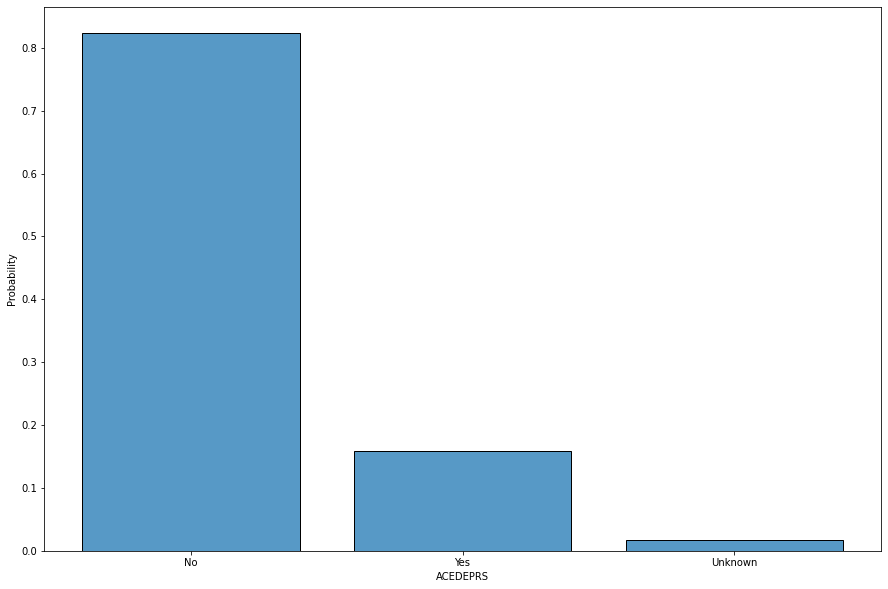

In [ ]:
plt.figure(figsize=(15, 10))
sns.histplot(data=brfss_total, x='ACEDEPRS', stat='probability', discrete=True, shrink=0.8)

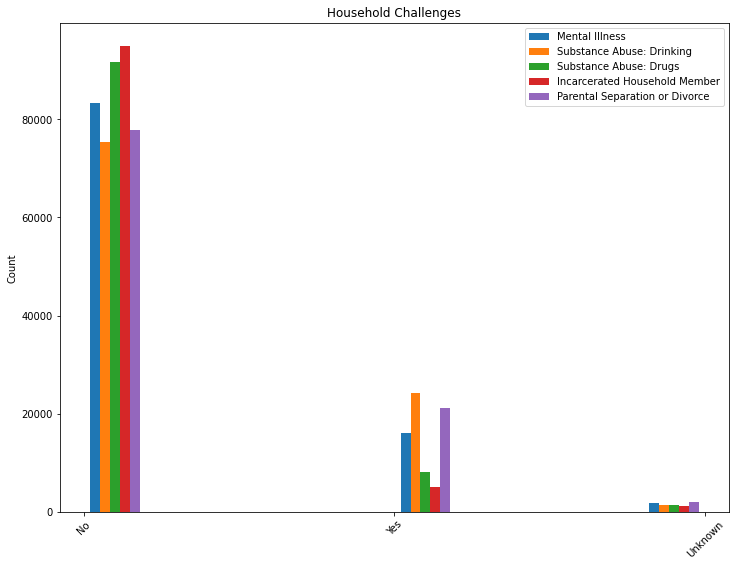

In [ ]:
plt.figure(figsize=(12, 9))
plt.title('Household Challenges')
plt.hist(x=[brfss_total['ACEDEPRS'], 
            brfss_total['ACEDRINK'],
            brfss_total['ACEDRUGS'], 
            brfss_total['ACEPRISN'],
            brfss_total['ACEDIVRC']])
plt.ylabel('Count')
plt.legend(labels=['Mental Illness', 'Substance Abuse: Drinking', 'Substance Abuse: Drugs', 
                   'Incarcerated Household Member', 'Parental Separation or Divorce'], loc='best')
plt.xticks(rotation=45);
plt.savefig('household_challenges.jpg')

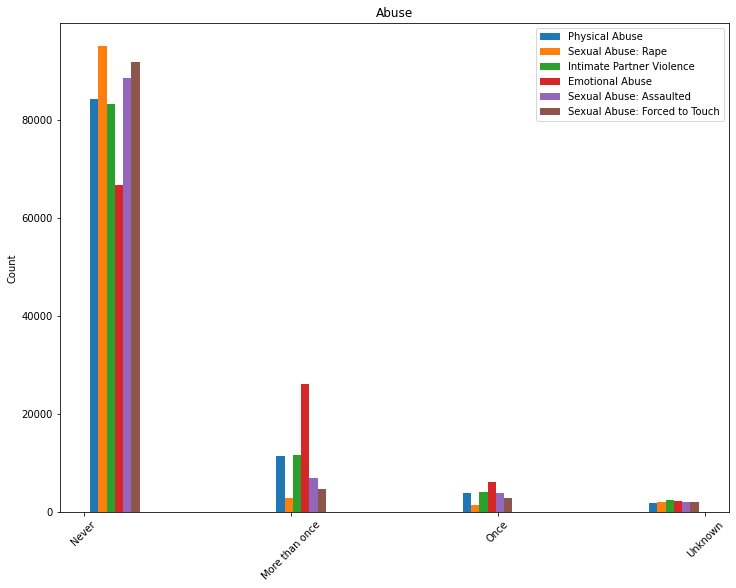

In [ ]:
plt.figure(figsize=(12, 9))
plt.title('Abuse')
plt.hist(x=[brfss_total['ACEHURT'], 
            brfss_total['ACEHVSEX'],
            brfss_total['ACEPUNCH'], 
            brfss_total['ACESWEAR'],
            brfss_total['ACETOUCH'],
            brfss_total['ACETTHEM']])
plt.ylabel('Count')
plt.legend(labels=['Physical Abuse', 'Sexual Abuse: Rape', 'Intimate Partner Violence', 
                   'Emotional Abuse', 'Sexual Abuse: Assaulted', 'Sexual Abuse: Forced to Touch'])
plt.xticks(rotation=45);
plt.savefig('abuse.jpg')

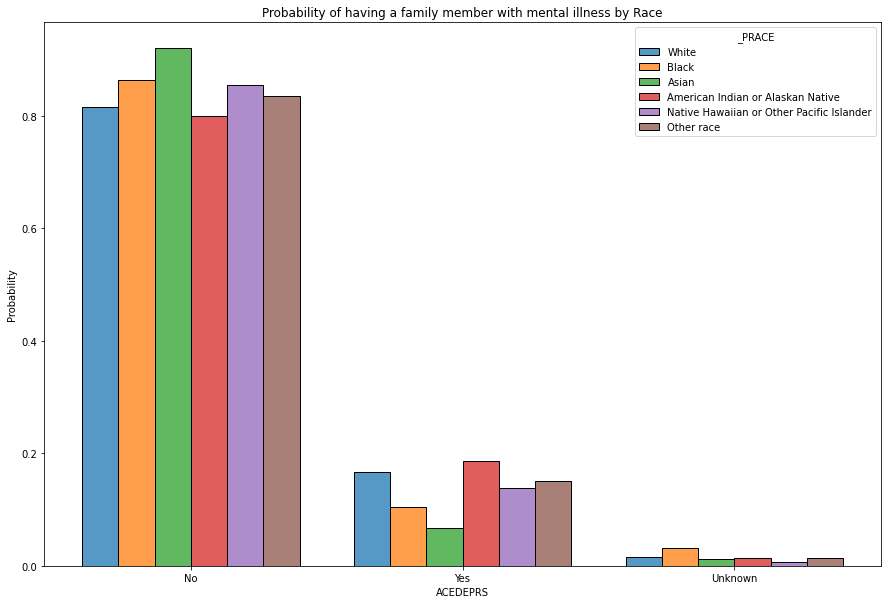

In [30]:
plt.figure(figsize=(15, 10))
sns.histplot(data=brfss_total, x='ACEDEPRS', hue='_PRACE', multiple='dodge', stat='probability', common_norm = False, discrete=True, shrink=0.8)
plt.title('Probability of having a family member with mental illness by Race');

plt.savefig('depr_race.jpg')

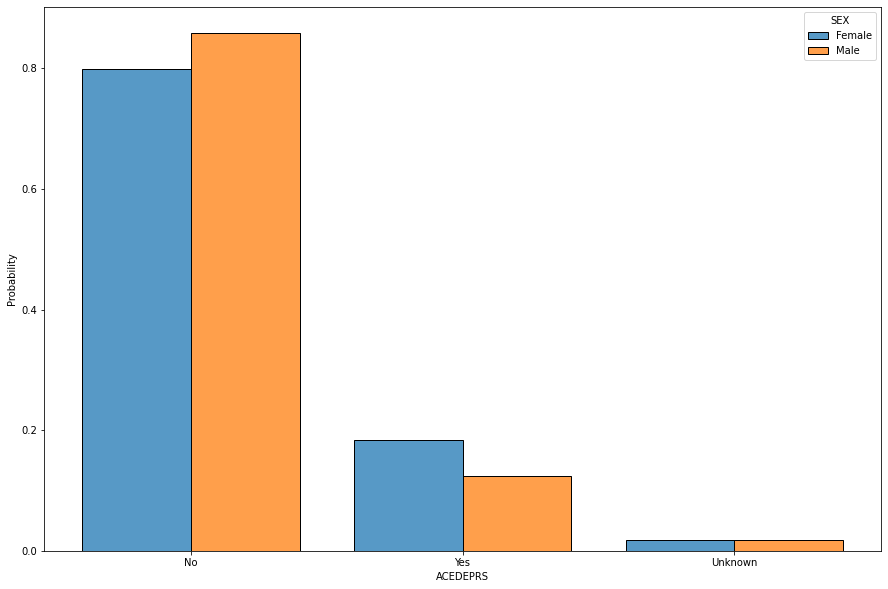

In [ ]:
plt.figure(figsize=(15, 10))
sns.histplot(data=brfss_total, x='ACEDEPRS', hue='SEX', multiple='dodge', stat='probability', common_norm = False, discrete=True, shrink=0.8)

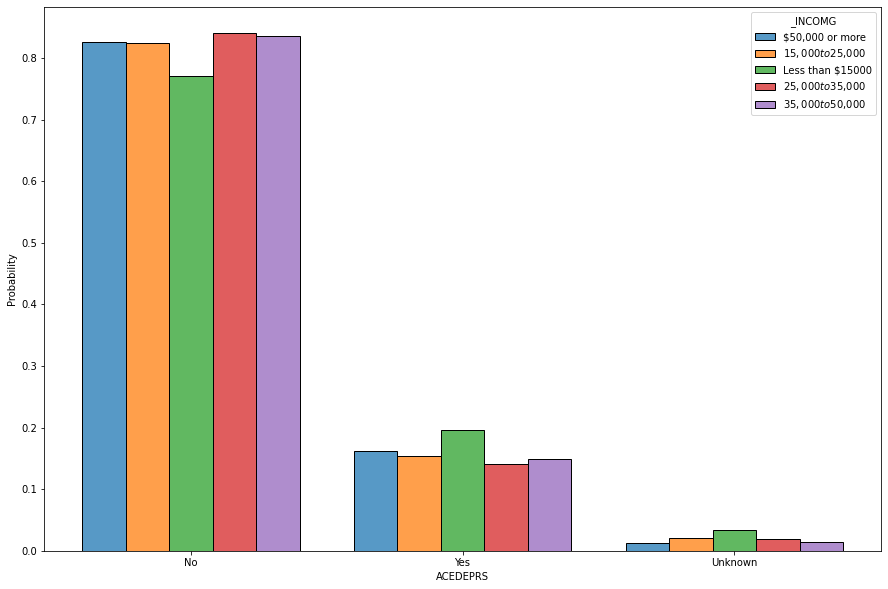

In [ ]:
plt.figure(figsize=(15, 10))
sns.histplot(data=brfss_total, x='ACEDEPRS', hue='_INCOMG', multiple='dodge', stat='probability', common_norm = False, discrete=True, shrink=0.8)

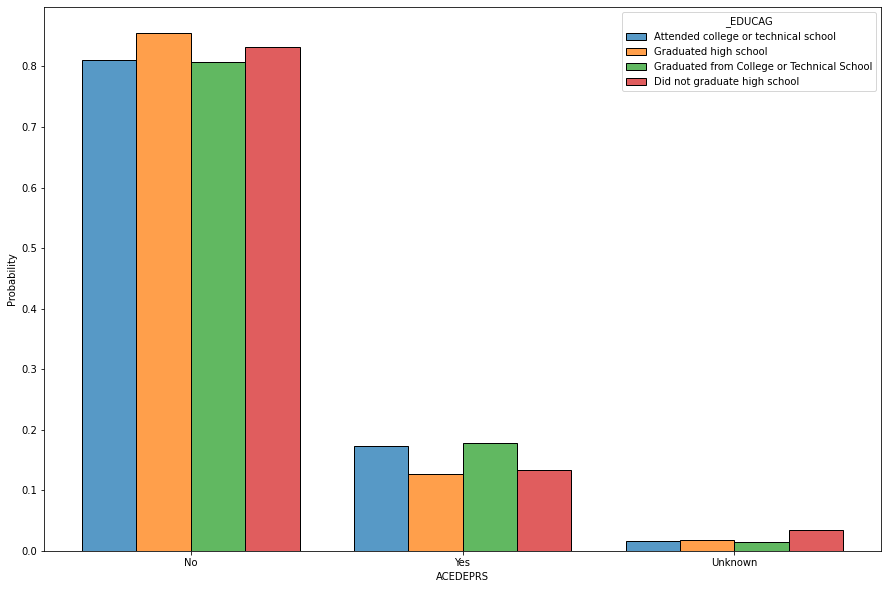

In [ ]:
plt.figure(figsize=(15, 10))
sns.histplot(data=brfss_total, x='ACEDEPRS', hue='_EDUCAG', multiple='dodge', stat='probability', common_norm = False, discrete=True, shrink=0.8)